# seaborn , is python library .it is used for data visualization . seaborn made by matplotlib library.basically matplot and seaborn are both is used for data visualization.

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import warnings
warnings.filterwarnings('ignore')

# line plot

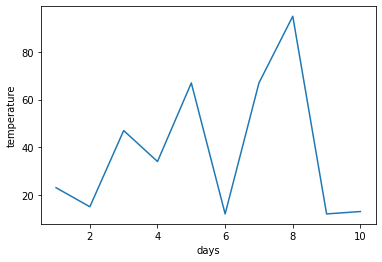

In [16]:
days=[1,2,3,4,5,6,7,8,9,10]
temperature=[23,15,47,34,67,12,67,95,12,13]
data_frame = pd.DataFrame({'days':days ,'temperature':temperature})
sns.lineplot('days','temperature',data = data_frame)
plt.show()


In [70]:
df = pd.read_csv('C:\\Users\\Ankit\\Desktop\\udemy ML coures\\kaggle datasets\\seaborn-data-master\\tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


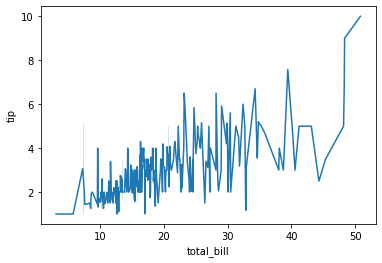

In [23]:
sns.lineplot(x = 'total_bill' ,y =  'tip' ,data = df)
plt.show()

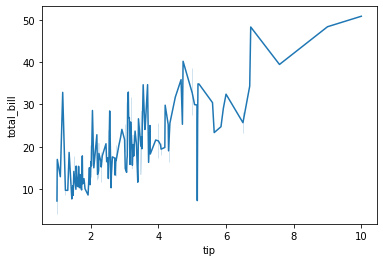

In [24]:
sns.lineplot(x =  'tip' ,y = 'total_bill'  ,data = df)
plt.show()

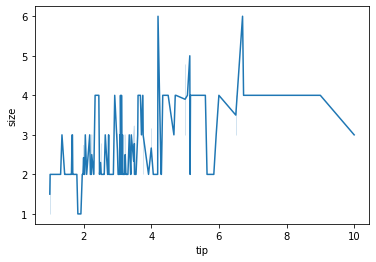

In [25]:
sns.lineplot(x =  'tip' ,y = 'size'  ,data = df)
plt.show()

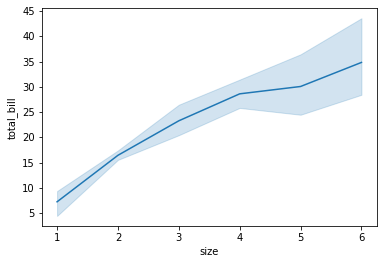

In [26]:
sns.lineplot(x =  'size' ,y = 'total_bill'  ,data = df)
plt.show()

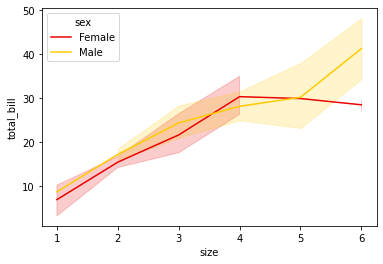

In [44]:
sns.lineplot(x =  'size' ,y = 'total_bill',data = df ,hue = 'sex',palette='hot')
plt.show()

# distplot graph

<AxesSubplot:xlabel='size', ylabel='Density'>

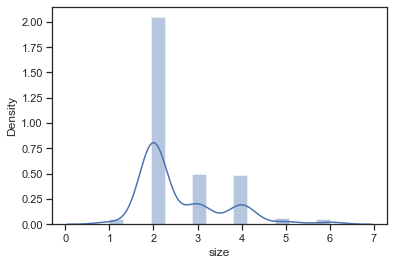

In [72]:
sns.distplot(df['size'])

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

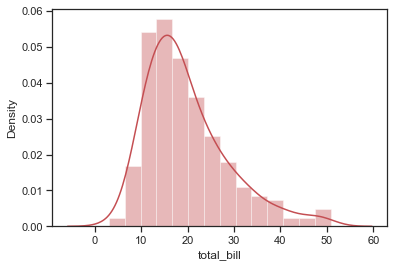

In [79]:
sns.distplot(df['total_bill'] ,color = 'r',kde =True)

<AxesSubplot:xlabel='tip', ylabel='Density'>

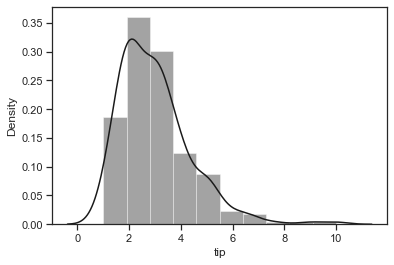

In [78]:
sns.distplot(df['tip'],color = 'k',bins =10)

# violin plot

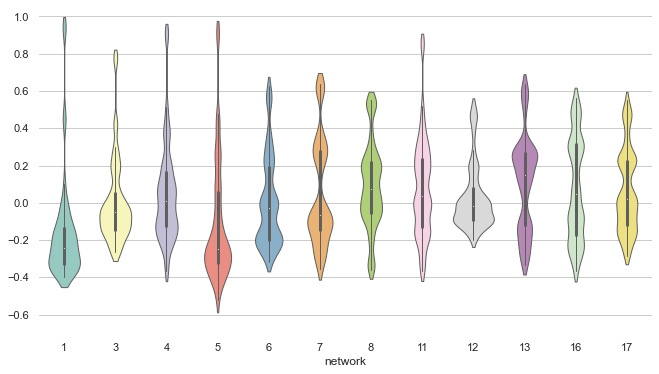

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

# facet grid graph

<Figure size 1080x360 with 0 Axes>

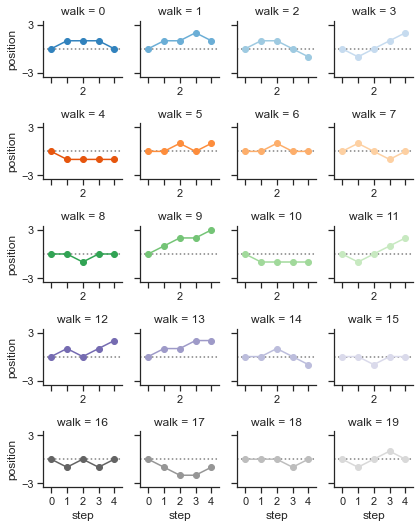

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
sns.set_theme(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

# vertical Box plot

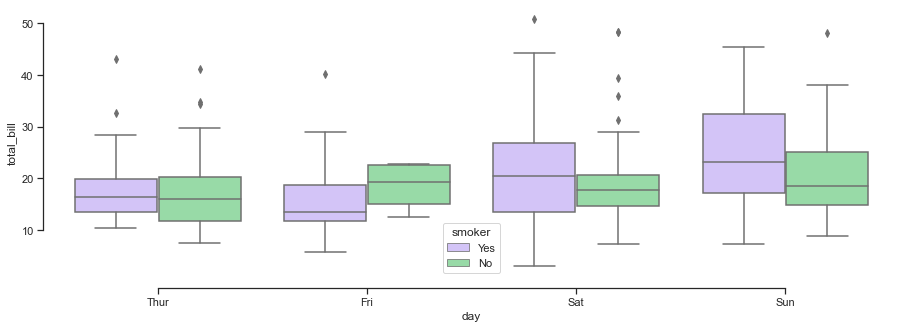

In [55]:
plt.figure(figsize = (15,5))
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

# scatter plot

<AxesSubplot:>

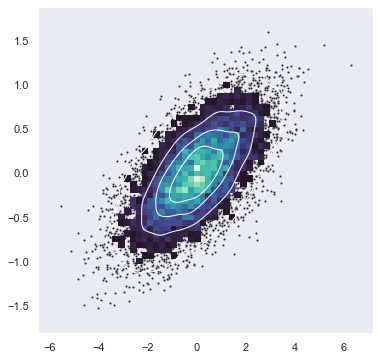

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
n = 10000
mean = [0, 0]
cov = [(2, .4), (.4, .2)]
rng = np.random.RandomState(0)
x, y = rng.multivariate_normal(mean, cov, n).T

# Draw a combo histogram and scatterplot with density contours

f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

# horizontal box plot

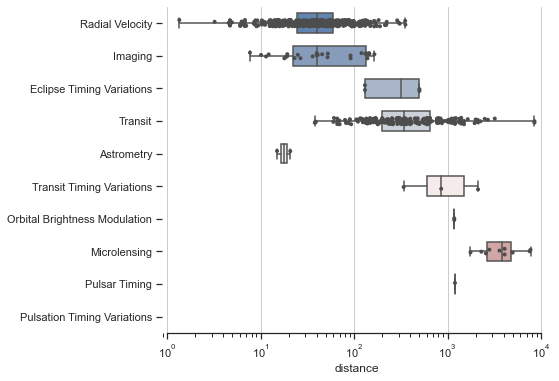

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)